In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl

invoice = pd.read_csv("fct_invoice.csv")
customer = pd.read_json("dim_customer.json")

**EASY | Question 1: How many unique customers are in the dataset?**

In [17]:
'''
1. To answer this question, I used the UNIQUE function for the "customer_id" to create a list of unique IDs
2. Since the output is a list, I used len to count the elements inside it

'''
numCustomers = len(invoice["customer_id"].unique())

print(f"There are {numCustomers} customers in the dataset.")

There are 5191 customers in the dataset.


**EASY | Question 2: What are the different categories of products available? How many unique categories are there?**

In [11]:
'''
1. I used the UNIQUE function under the "category" column then made a list to convert it for printing the answer
2. Like the previous number, I used the LEN and UNIQUE functions together to count the number of unique categories

'''

listCategory = invoice["category"].unique()
uniqueCategories = (", ".join(listCategory))
numUnique = len(listCategory)

print(f"There are {numUnique} categories of products available.")
print(f"These are: {uniqueCategories}.")

There are 8 categories of products available.
These are: Clothing, Shoes, Books, Cosmetics, Food & Beverage, Toys, Technology, Souvenir.


**EASY | Question 3: Which payment method is the most popular? How many times was it used?**

In [18]:
'''
1. I used the MODE function to find what the mode of the payment_method column was.
2. I converted the payment_method column into a series, then into a list, and then I counted the number of times paymethodMode occurred.
3. I made a DataFrame out of the unique payment_method values to confirm my answers, and I used RESET_INDEX() to add the indices.

'''

paymethodMode = invoice["payment_method"].mode()[0]
paymethodModeCount = pd.Series(invoice["payment_method"]).to_list().count(paymethodMode)
paymethodTable = pd.DataFrame(invoice["payment_method"].value_counts().reset_index()) 

print(f"Based on the mode function, the most popular payment method is {paymethodMode} used {paymethodModeCount} times, supported by the table below.")
paymethodTable

Based on the mode function, the most popular payment method is Cash used 44447 times, supported by the table below.


,payment_method,count
0,Cash,44447
1,Credit Card,34931
2,Debit Card,20079


**MEDIUM | Question 1: What are the three most popular categories, by total sales?**

In [13]:
'''
NOTE: I put the first line to change the display under sales because I did not like looking at scientific notation
NOTE2: I used reset_index() so that the indexes would look normal and in order based on how I wanted the data arranged

1. I made a new column called SALES, which is equivalent to quantity multiplied by price (assuming the sales means REVENUE)
2. I defined the variable categorySales to group the unique values under category and SUM up the values in their SALES column
3. I redefined categorySales as a DataFrame so that I could display it as a table instead of organized text
4. I looked for the Top 3 Sales using the AT function on indices 0, 1, and 2, since the new table arranges them in descending order
5. I used ,.2f to further format the numbers displayed so that they would have commas and two decimal places

'''
pd.set_option("display.float_format", "{:,.2f}".format)

invoice["sales"] = invoice["quantity"] * invoice["price"] #1
categorySales = invoice.groupby("category")["sales"].sum().reset_index() #2
categorySales = pd.DataFrame(categorySales.sort_values(by = "sales", ascending = False)).reset_index(drop=True) #3

categoryTop1, salesTop1 = categorySales.at[0, "category"], categorySales.at[0, "sales"]
print(f"Top 1 Category and Sales: {categoryTop1} with {salesTop1:,.2f} in sales\n")

categoryTop2, salesTop2 = categorySales.at[1, "category"], categorySales.at[1, "sales"]
print(f"Top 2 Category and Sales: {categoryTop2} with {salesTop2:,.2f} in sales\n")

categoryTop3, salesTop3 = categorySales.at[2, "category"], categorySales.at[2, "sales"]
print(f"Top 3 Category and Sales: {categoryTop3} with {salesTop3:,.2f} in sales\n")

print("Category x Sales Table for Reference:")
categorySales

Top 1 Category and Sales: Clothing with 113,996,791.04 in sales

Top 2 Category and Sales: Shoes with 66,553,451.47 in sales

Top 3 Category and Sales: Technology with 57,862,350.00 in sales

Category x Sales Table for Reference:


,category,sales
0,Clothing,"113,996,791.04"
1,Shoes,"66,553,451.47"
2,Technology,"57,862,350.00"
3,Cosmetics,"6,792,862.90"
4,Toys,"3,980,426.24"
5,Food & Beverage,"849,535.05"
6,Books,"834,552.90"
7,Souvenir,"635,824.65"


**MEDIUM | Question 2: What are the total sales attributed to customers over the age of 45?**

In [14]:
'''
1. I made a new table that merges both of the given data sets by matching the customer_id and the id values for those where both exist in both sets
2. I made a variable called sales45Up then located all rows where the age > 45 using Up45Bool
3. Using the filtered rows, I summed up all the sales where the rows under "Age" met the condition

'''

invoiceXcustomer = pd.DataFrame.merge(invoice, customer, left_on = "customer_id", right_on = "id", how = "inner")

Up45Bool = invoiceXcustomer["age"] > 45

sales45Up = invoiceXcustomer.loc[Up45Bool, "sales"].sum()

print(f"{sales45Up:,.2f} in sales can be attributed to customers over the age of 45.")

82,039,768.15 in sales can be attributed to customers over the age of 45.


**MEDIUM | Question 3: How is the data distributed across different invoice dates? Are there any seasonal trends or patterns?**

Based on the summary below, the best month was 2021/07, with 10,311,119.68 in sales:



,year_month,sales
0,2021/07,"10,311,119.68"
1,2022/10,"10,282,075.37"
2,2021/10,"10,263,015.06"
3,2022/07,"10,067,602.95"
4,2022/03,"9,986,685.16"


Based on the summary below, the worst month was 2023/03, with 2,514,146.79 in sales:



,year_month,sales
0,2023/03,"2,514,146.79"
1,2022/02,"8,344,111.92"
2,2021/02,"8,772,315.22"
3,2022/11,"8,941,584.66"
4,2021/09,"9,188,165.62"


The summary below showcases sales data from January, 2021 (2021-1) until March, 2023 (2023-3)

The table below tells us that the business has had a relatively stable trend with a sudden drop in sales on March, 2023.
This drop resulted in a trend line that tilts slightly downward.
This may be attributed to how the data set ends in the middle of March, 2023, particularly 08-03-2023.
Hence, rather than a loss of customers, the drop may be caused by the month being incomplete.



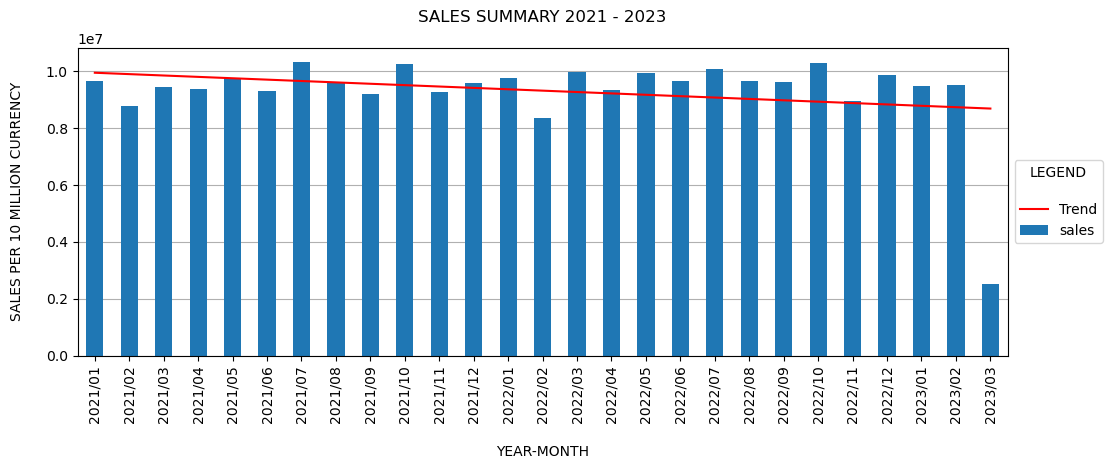

In [15]:
'''
Since this code is quite long, i'll divide my explanation into parts
NOTE: I usually use reset_index() to add the regular indices for referencing; I won't mention this in the next parts since that's pretty much it.

PART 1: REFERENCE TABLE
1. I changed the format of the date into YYYY-MM using the TO_DATETIME() and DT.STRFTIME() functions for
   (1) easier grouping when getting monthly sales, and (2) clarity as these will be x values in the bar graph
2. I made a separate dataframe called salesAnalytics, which displays year-months and their total sales
3. I arranged this in ascending order so that it would be chronological

PART 2: VARIABLES
1. I made two separate tables called peakPerformance and minPerformance to describe the 5 best and worst months in terms of sales
   using NLARGEST() and NSMALLEST() on the "sales" column of the salesAnalytics table
2. I defined the variables bestMonth and worstMonth with the help of the separate tables to determine the top 1 best and worst months
3. I did the same for bestMonthSales and worstMonthSales to get their corresponding total sales
4. I printed the results using f strings and displayed the related table using DISPLAY(), then I also briefly introduced the bar graph

PART 3: PLOT EDITING
1. I made a plot called salesPlot using the information from salesAnalytics, then I edited its appearance
2. I wanted to add a grid, but only horizontally, so I used the GRID function to add one then I set SET_AXISBELOW to True so it wouldn't overlap

PART 4: TREND LINE
1. Since the question asked about trends, I added a trendline using numpy functions.
2. To do this, I made two lists: one of x values (0 to 27), and one of y values (sales in chronological order)
3. I used numpy's POLYFIT() function; then I set it to 1 since I wanted the LINEAR trend
4. I plotted the trendline using POLY1D() on the trend function I made

PART 5: OTHERS
1. I edited the location of the legend using its parameters as it initially appeared inside of the bar plot area
2. I calculated for the latest invoice using the MAX function on dates formatted as DD/MM/YYYY
3. I interpreted the bar graph and trend, then I printed my interpretation

'''
# REFERENCE TABLE
invoice ["year_month"] = pd.to_datetime(invoice["invoice_date"], format = "%d/%m/%Y").dt.strftime("%Y/%m")
salesAnalytics = pd.DataFrame((invoice.groupby(["year_month"]).sum()["sales"])).sort_values(by = "year_month", ascending = True)

# VARIABLES
peakPerformance = salesAnalytics.nlargest(5,"sales").reset_index()
bestMonth, bestMonthSales = peakPerformance.iat[0,0], peakPerformance.iat[0,1]
minPerformance = salesAnalytics.nsmallest(5,"sales").reset_index()
worstMonth, worstMonthSales = minPerformance.iat[0,0], minPerformance.iat[0,1]

print(f"Based on the summary below, the best month was {bestMonth}, with {bestMonthSales:,.2f} in sales:\n")
display(peakPerformance)
print(f"Based on the summary below, the worst month was {worstMonth}, with {worstMonthSales:,.2f} in sales:\n")
display(minPerformance)
print("The summary below showcases sales data from January, 2021 (2021-1) until March, 2023 (2023-3)\n")

# PLOT EDITING
# I made it separate lines because it was starting to look confusing on my end
salesPlot = salesAnalytics.plot(
    figsize = (12,4), 
    kind = "bar", 
    title = "SALES SUMMARY 2021 - 2023\n", 
    xlabel = "\nYEAR-MONTH", 
    ylabel = "SALES PER 10 MILLION CURRENCY\n",
    grid = True,
)
salesPlot.grid(axis = "x") # Added the grid
salesPlot.set_axisbelow(True) # Placed it behind the bars

# TREND LINE
x = np.arange(len(salesAnalytics["sales"])) # numbers 0 to 26; "as time increases ..."
y = salesAnalytics.reset_index()["sales"].tolist() # y values per month in order; "... sales behaves this way"
trend = np.polyfit(x, y, 1)
plotTrend = np.poly1d(trend)
salesPlot.plot(x, plotTrend(x), "r-", label = "Trend" )

# OTHERS
salesPlot.legend(loc = "center left", bbox_to_anchor = (1.0, 0.5), title = "LEGEND\n");

latestInvoice = pd.to_datetime(invoice["invoice_date"], format = "%d/%m/%Y").max().strftime("%d-%m-%Y")

print("The table below tells us that the business has had a relatively stable trend with a sudden drop in sales on March, 2023.")
print("This drop resulted in a trend line that tilts slightly downward.")
print(f"This may be attributed to how the data set ends in the middle of March, 2023, particularly {latestInvoice}.")
print("Hence, rather than a loss of customers, the drop may be caused by the month being incomplete.\n")

### HARD | Question 1: Create a pivot table showing the breakdown of sales across these dimenions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth)

In [19]:
nanBool = invoiceXcustomer["age"].isna()
invoiceXcustomer["age_range"] = np.where(nanBool, "No Age Available", ((invoiceXcustomer["age"] // 10)*10).astype("Int64").astype(str) + " to " + ((invoiceXcustomer["age"] // 10)*10 + 9).astype("Int64").astype(str))

pivot = pd.pivot_table(
    invoiceXcustomer,
    values = "sales",
    index = "category",
    columns = "age_range",
    aggfunc = "sum",
    fill_value = 0,
    margins = True,
    margins_name = "TOTAL SALES",
)

display(pivot)

age_range,10 to 19,20 to 29,30 to 39,40 to 49,50 to 59,60 to 69,70 to 79,80 to 89,No Age Available,TOTAL SALES
category,,,,,,,,,,
Books,"12,801.75","79,461.75","84,143.10","87,203.40","74,962.20","80,476.80","54,827.85","26,664.00","334,012.05","834,552.90"
Clothing,"1,927,413.84","10,250,732.80","11,354,126.96","11,215,189.92","10,321,851.76","10,660,642.08","7,769,371.28","4,493,698.00","46,003,764.40","113,996,791.04"
Cosmetics,"109,619.36","605,915.32","723,544.70","665,034.96","587,780.96","649,990.76","419,082.62","254,531.60","2,777,362.62","6,792,862.90"
Food & Beverage,"13,582.31","73,491.96","87,246.86","89,553.29","72,425.04","80,976.09","55,050.98","31,332.93","345,875.59","849,535.05"
Shoes,"993,281.35","5,924,878.24","7,200,839.66","7,025,590.02","5,852,857.84","5,978,893.54","4,480,269.05","2,628,744.60","26,468,097.17","66,553,451.47"
Souvenir,"12,375.15","54,943.32","64,092.72","66,391.80","54,943.32","55,025.43","38,673.81","23,718.06","265,661.04","635,824.65"
Technology,"1,129,800.00","5,261,550.00","6,159,300.00","5,954,550.00","4,435,200.00","5,471,550.00","3,638,250.00","1,946,700.00","23,865,450.00","57,862,350.00"
Toys,"60,426.24","385,100.80","420,582.40","390,906.88","345,067.52","363,955.20","273,244.16","153,932.80","1,587,210.24","3,980,426.24"
TOTAL SALES,"4,259,300.00","22,636,074.19","26,093,876.40","25,494,420.27","21,745,088.64","23,341,509.90","16,728,769.75","9,559,321.99","101,647,433.11","251,505,794.25"
